Прежде чем проверять задания:
- **Перезапустите ядро** (**restart the kernel**) (В меню, выбрать Ядро (Kernel) $\rightarrow$ Перезапустить (Restart)
- Затем **Выполнить все ячейки**  **run all cells** (В меню, выбрать Ячейка (Cell) $\rightarrow$ Запустить все (Run All).

Убедитесь, что заполнены все ячейки с комментарием "НАЧАЛО ВАШЕГО РЕШЕНИЯ".

После ячеек с заданием следуют ячейки с проверкой с помощью assert.

Если в коде есть ошибки, assert выведет уведомление об ошибке.

Если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Цель занятия
На этом занятии мы на практике закрепим работу с алгоритмами кластеризации и снижения размерности.

Библиотека scikit-learn (sklearn) предоставляет несколько встроенных наборов данных, которые можно использовать для тестирования алгоритмов кластеризации. Наиболее подходящие:

1. `sklearn.datasets.make_blobs`: Этот набор данных генерирует синтетические кластеры в форме кругов, эллипсов или свободных облаков точек. Он полезен для тестирования алгоритмов кластеризации на наборах данных с явно различимыми кластерами.

2. `sklearn.datasets.make_moons` и `sklearn.datasets.make_circles`: Эти наборы данных также генерируют синтетические кластеры, но в форме полумесяца и круга соответственно. Они полезны для тестирования алгоритмов, которые должны обнаруживать нелинейные связи между точками данных.

3. `sklearn.datasets.load_iris`: Это классический набор данных ирисов Фишера. Он содержит измерения цветков ирисов в трех разных видах. Этот набор данных часто используется для тестирования алгоритмов кластеризации.

4. `sklearn.datasets.load_digits`: Этот набор данных состоит из изображений рукописных цифр от 0 до 9. Он может быть полезным для тестирования алгоритмов кластеризации на задачах с изображениями.

Для тестирования алгоритмов кластеризации вы будем использовать `sklearn.datasets.make_blobs`, `sklearn.datasets.make_moons` и `sklearn.datasets.make_circles`.

In [1]:
# Импорт необходимых библиотек
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris, fetch_openml
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Загрузка необходимых датасетов (!!! может занять некоторое время)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Генерируем синтетические данные с помощью make_blobs
X_blobs, y_blobs = make_blobs(n_samples=500, centers=4, random_state=42)

# Генерируем синтетические данные с помощью make_moons
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

# Генерируем синтетические данные с помощью make_circles
X_circles, y_circles = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)

# Загружаем набор данных Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Загружаем набор данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)  # Преобразуем метки в целочисленный тип

## Часть 1. K-Means.

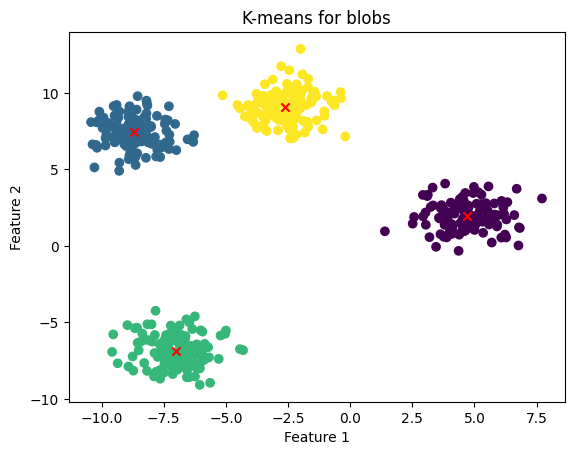

In [4]:
# Task 1.1
kmeans_blobs = KMeans(n_clusters=4)

# Обучаем модель на данных
kmeans_blobs.fit(X_blobs)

# Получаем метки кластеров для каждого образца
labels_kmeans_blobs = kmeans_blobs.labels_

# Получаем координаты центроидов кластеров
centroids_kmeans_blobs = kmeans_blobs.cluster_centers_

# Визуализируем результаты
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_kmeans_blobs, cmap='viridis')
plt.scatter(centroids_kmeans_blobs[:, 0], centroids_kmeans_blobs[:, 1], marker='x', color='red')
plt.title("K-means for blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

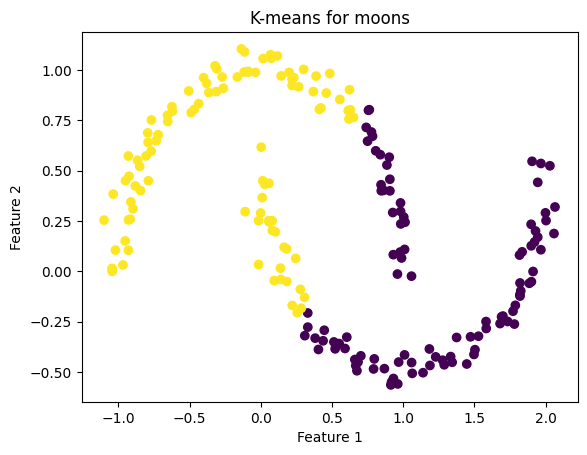

'Можно заметить, что на кластерах невыпуклой формы KMeans работает хуже.'

In [5]:
# Task 1.2
kmeans_moons = KMeans(n_clusters=2)

# Обучаем модель на данных
kmeans_moons.fit(X_moons)

# Получаем метки кластеров для каждого образца
labels_kmeans_moons = kmeans_moons.labels_

# Визуализируем результаты
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans_moons, cmap='viridis')
plt.title("K-means for moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что на кластерах невыпуклой формы KMeans работает хуже."""

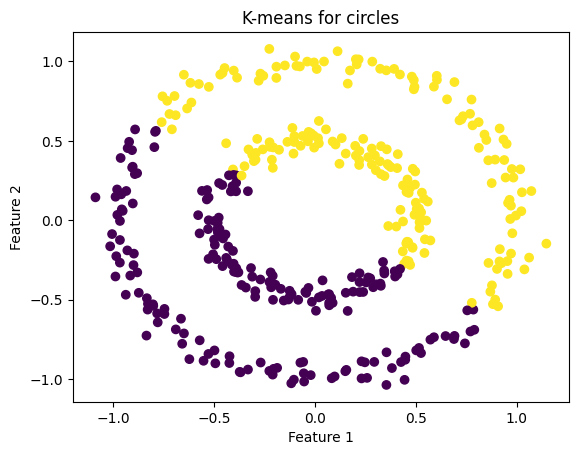

'Аналогично, на вложенных кластерах KMeans работает хуже.'

In [6]:
# Task 1.3 
kmeans_circles = KMeans(n_clusters=2)

# Обучаем модель на данных
kmeans_circles.fit(X_circles)

# Получаем метки кластеров для каждого образца
labels_kmeans_circles = kmeans_circles.labels_

# Визуализируем результаты
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_kmeans_circles, cmap='viridis')
plt.title("K-means for circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Аналогично, на вложенных кластерах KMeans работает хуже."""

In [7]:
assert type(kmeans_blobs) == KMeans
assert type(kmeans_moons) == KMeans
assert type(kmeans_circles) == KMeans

## Часть 2. DBSCAN.

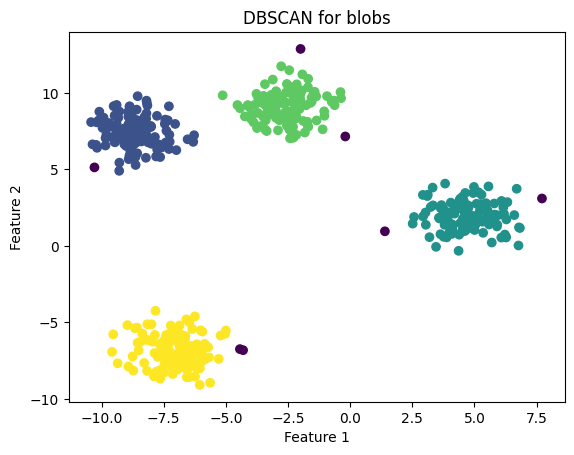

'Можно заметить, что DBSCAN пометил некоторые точки как шумовые'

In [8]:
# Task 2.1
dbscan_blobs = DBSCAN(eps=1, min_samples=5)

# Обучаем модель на данных
dbscan_blobs.fit(X_blobs)

# Получаем метки кластеров для каждого образца
labels_dbscan_blobs = dbscan_blobs.labels_

# Визуализируем результаты
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_dbscan_blobs, cmap='viridis')
plt.title("DBSCAN for blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что DBSCAN пометил некоторые точки как шумовые"""

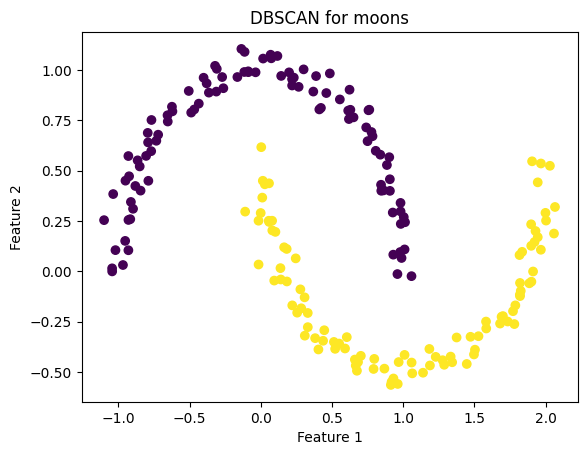

'Можно заметить, что DBSCAN лучше отрабатывает на сложных кластерах, чем K-Means'

In [9]:
# Task 2.2
dbscan_moons = DBSCAN(eps=0.3, min_samples=5)

# Обучаем модель на данных
dbscan_moons.fit(X_moons)

# Получаем метки кластеров для каждого образца
labels_dbscan_moons = dbscan_moons.labels_

# Визуализируем результаты
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan_moons, cmap='viridis')
plt.title("DBSCAN for moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что DBSCAN лучше отрабатывает на сложных кластерах, чем K-Means"""

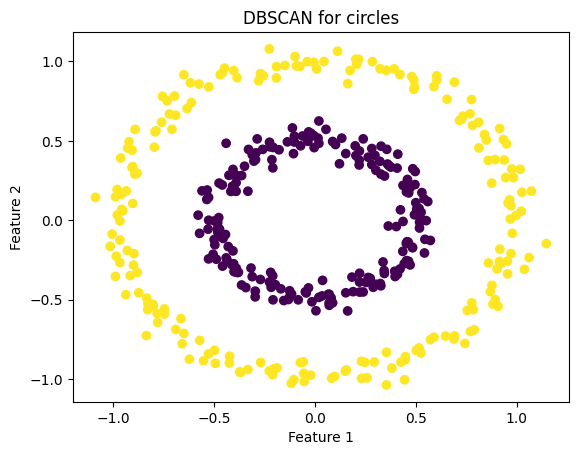

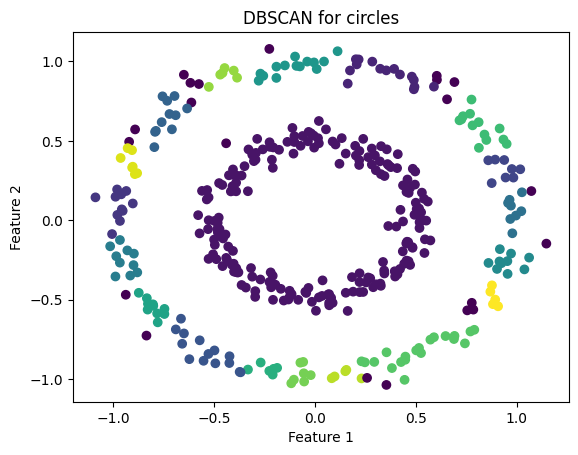

In [14]:
# Task 2.3
dbscan_circles = DBSCAN(eps=0.2, min_samples=5)

# Обучаем модель на данных
dbscan_circles.fit(X_circles)

# Получаем метки кластеров для каждого образца
labels_dbscan_circles = dbscan_circles.labels_

# Визуализируем результаты
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_dbscan_circles, cmap='viridis')
plt.title("DBSCAN for circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что DBSCAN хорошо отрабатывает на вложенных кластерах.
Однако если передать параметр eps=0.1 или eps=0.5, качество кластеризации ухудшится"""

dbscan_circles_2 = DBSCAN(eps=0.1, min_samples=5)

# Обучаем модель на данных
dbscan_circles_2.fit(X_circles)

# Получаем метки кластеров для каждого образца
labels_dbscan_circles_2 = dbscan_circles_2.labels_

# Визуализируем результаты
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_dbscan_circles_2, cmap='viridis')
plt.title("DBSCAN for circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [15]:
assert type(dbscan_blobs) == DBSCAN
assert type(dbscan_moons) == DBSCAN
assert type(dbscan_circles) == DBSCAN

## Часть 3. Агломеративная кластеризация.

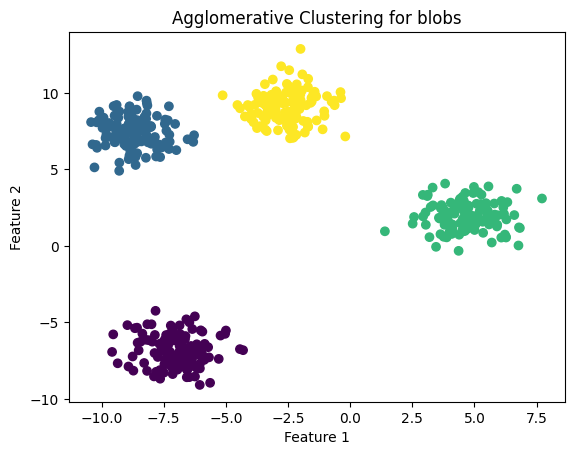

In [16]:
# Task 3.1
agglomerative_blobs = AgglomerativeClustering(n_clusters=4)

# Обучаем модель на данных
agglomerative_blobs.fit(X_blobs)

# Получаем метки кластеров для каждого образца
labels_agglomerative_blobs = agglomerative_blobs.labels_

# Визуализируем результаты
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_agglomerative_blobs, cmap='viridis')
plt.title("Agglomerative Clustering for blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


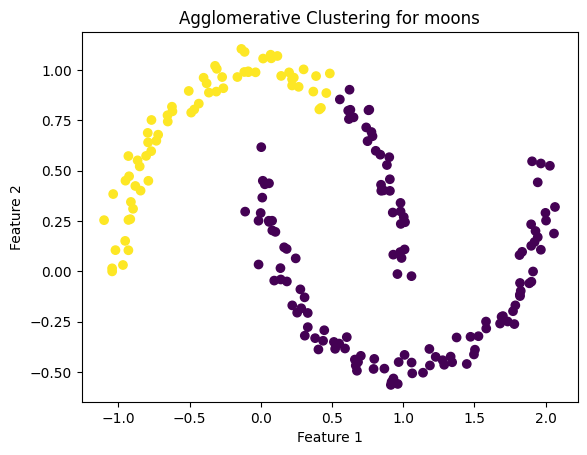

'Можно заметить, что AgglomerativeClustering хуже отрабатывает на сложных кластерах, чем DBSCAN'

In [17]:
# Task 3.2
agglomerative_moons = AgglomerativeClustering(n_clusters=2)

# Обучаем модель на данных
agglomerative_moons.fit(X_moons)

# Получаем метки кластеров для каждого образца
labels_agglomerative_moons = agglomerative_moons.labels_

# Визуализируем результаты
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_agglomerative_moons, cmap='viridis')
plt.title("Agglomerative Clustering for moons")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что AgglomerativeClustering хуже отрабатывает на сложных кластерах, чем DBSCAN"""

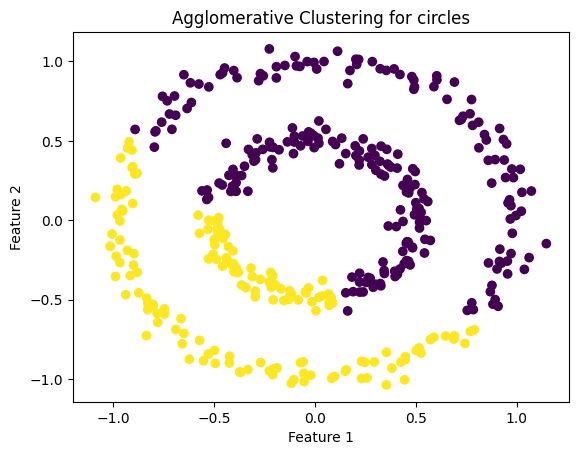

'Можно заметить, что AgglomerativeClustering хуже отрабатывает на вложенных кластерах, чем DBSCAN'

In [18]:
# Task 3.3
agglomerative_circles = AgglomerativeClustering(n_clusters=2)

# Обучаем модель на данных
agglomerative_circles.fit(X_circles)

# Получаем метки кластеров для каждого образца
labels_agglomerative_circles = agglomerative_circles.labels_

# Визуализируем результаты
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=labels_agglomerative_circles, cmap='viridis')
plt.title("Agglomerative Clustering for circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

"""Можно заметить, что AgglomerativeClustering хуже отрабатывает на вложенных кластерах, чем DBSCAN"""

In [19]:
assert type(agglomerative_blobs) == AgglomerativeClustering
assert type(agglomerative_moons) == AgglomerativeClustering
assert type(agglomerative_circles) == AgglomerativeClustering

## Часть 4. PCA.

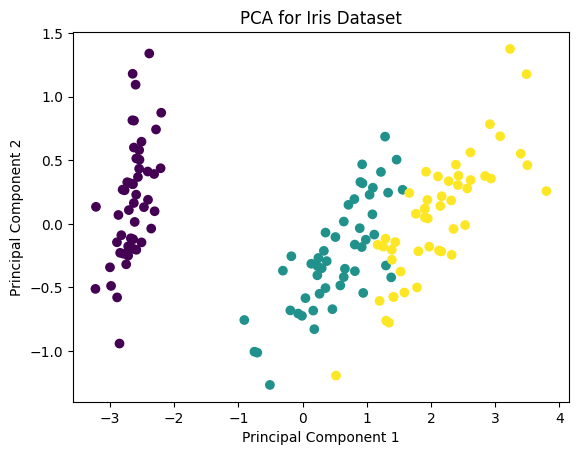

In [22]:
# Task 4.1
pca_iris = PCA(n_components=2)

X_iris_pca = pca_iris.fit_transform(X_iris)

# Визуализируем результаты
plt.scatter(X_iris_pca[:, 0], X_iris_pca[:, 1], c=y_iris, cmap='viridis')
plt.title("PCA for Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

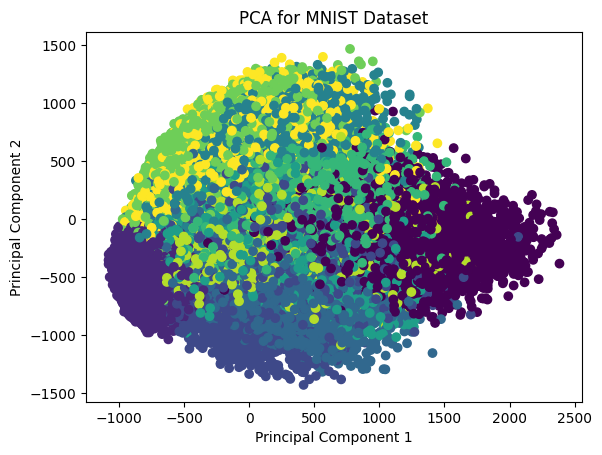

In [23]:
# Task 4.2
pca_mnist = PCA(n_components=2)

X_mnist_pca = pca_mnist.fit_transform(X_mnist)

# Визуализируем результаты
plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1], c=y_mnist, cmap='viridis')
plt.title("PCA for MNIST Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [24]:
assert type(pca_iris) == PCA
assert type(pca_mnist) == PCA

## Часть 5. t-SNE.

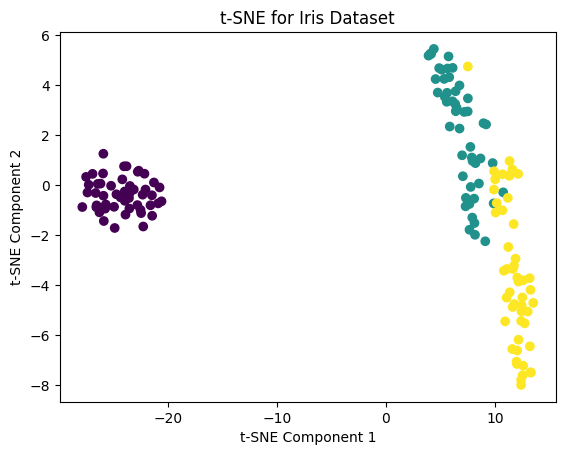

'На небольших датасетах разница в качестве PCA и t-SNE не слишком заметна'

In [25]:
# Task 5.1
tsne_iris = TSNE(n_components=2)

X_iris_tsne = tsne_iris.fit_transform(X_iris)

# Визуализируем результаты
plt.scatter(X_iris_tsne[:, 0], X_iris_tsne[:, 1], c=y_iris, cmap='viridis')
plt.title("t-SNE for Iris Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

"""На небольших датасетах разница в качестве PCA и t-SNE не слишком заметна"""

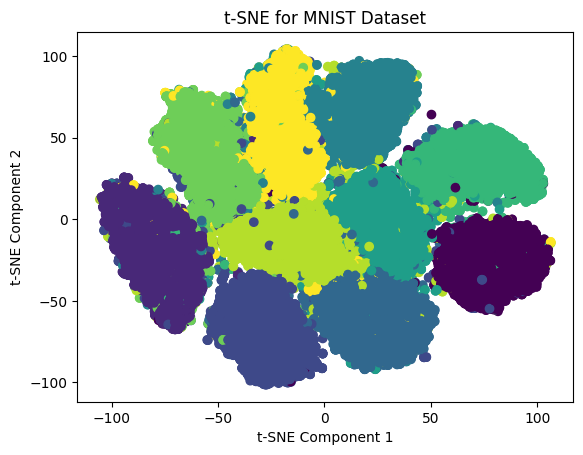

'На бОльших по размеру датасетах разница в качестве PCA и t-SNE заметна, но t-SNE работает значительно дольше.'

In [26]:
# Task 5.2
tsne_mnist = TSNE(n_components=2)

X_mnist_tsne = tsne_mnist.fit_transform(X_mnist)

# Визуализируем результаты
plt.scatter(X_mnist_tsne[:, 0], X_mnist_tsne[:, 1], c=y_mnist, cmap='viridis')
plt.title("t-SNE for MNIST Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

"""На бОльших по размеру датасетах разница в качестве PCA и t-SNE заметна, но t-SNE работает значительно дольше."""

In [27]:
assert type(tsne_iris) == TSNE
assert type(tsne_mnist) == TSNE